In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df  = pd.read_csv('Salary_Data.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


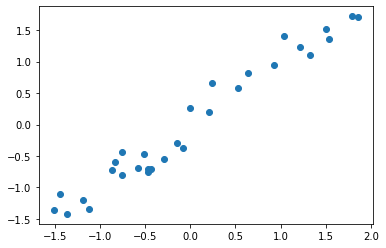

In [6]:
x = df['YearsExperience']
y = df['Salary']
x = np.array(x)
y = np.array(y)
def norm(x):
    xx = np.mean(x)
    m = np.max(x)
    n = np.min(x)
    x= (x-xx)/(m-n)
    return x
def stand(x):
    x = (x-np.mean(x))/np.std(x)
    return x
x  = stand(x)
y = stand(y)
plt.scatter(x,y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


iteration:  0 current cost : 1.0778242408256087 current weight and bias : 2.1644310927366663 -0.27301187775117325
iteration:  1 current cost : 1.816169813567829 current weight and bias : -0.6265274661686586 0.4417962260433396
iteration:  2 current cost : 3.2504945583889313 current weight and bias : 3.0463635704190226 -0.8426927340766586
iteration:  3 current cost : 5.992273623792708 current weight and bias : -1.8573234351395156 1.1914941046582568
iteration:  4 current cost : 11.199050172407157 current weight and bias : 4.75476935523062 -1.843616450254812
iteration:  5 current cost : 21.06021286939079 current weight and bias : -4.220573087896492 2.541131730377443
iteration:  6 current cost : 39.71531030765349 current weight and bias : 8.016735813493733 -3.675632462280652
iteration:  7 current cost : 74.98995120014447 current weight and bias : -8.716726306400117 5.038969110233697
iteration:  8 current cost : 141.67713094620728 current weight and bias : 14.2084592388315 -7.091209164175555

iteration:  406 current cost : 1.604932121384943e+112 current weight and bias : 1.4037781339165372e+56 -7.643720141426657e+55
iteration:  407 current cost : 3.0337177127246993e+112 current weight and bias : -1.93000183681952e+56 1.050906375919154e+56
iteration:  408 current cost : 5.7344750210106425e+112 current weight and bias : 2.6534870433793126e+56 -1.4448517090022597e+56
iteration:  409 current cost : 1.0839572722493164e+113 current weight and bias : -3.648179683074731e+56 1.986472352668787e+56
iteration:  410 current cost : 2.048946701759462e+113 current weight and bias : 5.01574523727445e+56 -2.7311262348455266e+56
iteration:  411 current cost : 3.873014826441772e+113 current weight and bias : -6.895959758220598e+56 3.754922891647807e+56
iteration:  412 current cost : 7.320953655337562e+113 current weight and bias : 9.480996090790056e+56 -5.162502465953647e+56
iteration:  413 current cost : 1.3838408791437718e+114 current weight and bias : -1.3035065462268726e+57 7.0977307603996

iteration:  763 current cost : 8.366821041730363e+210 current weight and bias : -3.205164904252207e+105 1.7452461285226898e+105
iteration:  764 current cost : 1.5815356210574015e+211 current weight and bias : 4.4066608554853106e+105 -2.3994733586235036e+105
iteration:  765 current cost : 2.9894925542188146e+211 current weight and bias : -6.058552516129297e+105 3.298945807499096e+105
iteration:  766 current cost : 5.650878559253999e+211 current weight and bias : 8.329676322834278e+105 -4.535596697376583e+105
iteration:  767 current cost : 1.0681554783059437e+212 current weight and bias : -1.1452159151624207e+106 6.235821562903626e+105
iteration:  768 current cost : 2.0190774122486604e+212 current weight and bias : 1.5745143526717967e+106 -8.573396877827651e+105
iteration:  769 current cost : 3.8165544992740214e+212 current weight and bias : -2.164740651912691e+106 1.1787241389652467e+106
iteration:  770 current cost : 7.214229705886528e+212 current weight and bias : 2.976220624531956e+1

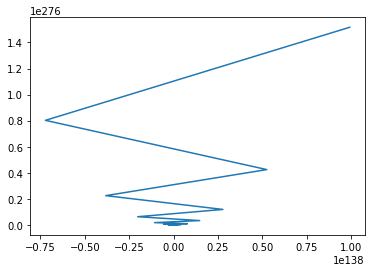

999


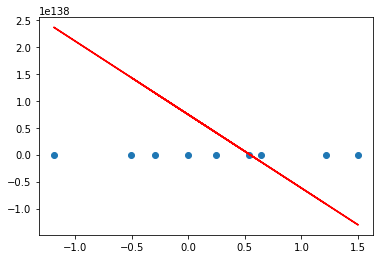

In [15]:
def linearRegression(x,y,iterations  = 1000 ,learning_rate = 0.001,stopping = 1e-6):
    m = 0
    c = 0
    learning_rate = 1
    n = float(len(x))
    costs = []
    weights  = []
    cm =[]
    previous_cost  = 0
    for i in range(iterations):
        Yp = np.dot(m , x) + c
        cost = (np.square(np.subtract(y,Yp)).mean())
        costs.append(cost)
        weights.append(m)
        cm.append(c)
        if i > 0:
            if np.abs(cost - previous_cost) < stopping:
                break


        weight_derivative = (2/n) *sum(x * (Yp-y))
        bias_derivative = (2/n) * sum(Yp-y)

        m = m - (learning_rate * weight_derivative)
        c = c - (learning_rate * bias_derivative)
        previous_cost = cost
        print('iteration: ',i,'current cost :',cost,'current weight and bias :',m,c)
   # plt.plot(weights,costs)
    #plt.show()
    # plt.plot(cm,costs)
    # plt.show()
    print(i)
    return m,c

m,c = linearRegression(x_train,y_train)
plt.scatter(x_test,y_test)
plt.plot(x_test,m * x_test + c, color='red')
y_pred = m * x_test + c
plt.show()

In [8]:
from sklearn.metrics import mean_absolute_error
m = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
print("mse:     ",m)
print("r2_score:",r)

mse:      9.4004670466286e+137
r2_score: -1.8949080217392407e+276
